# Анализ и предсказание продаж по компьютерным играм

**Описание проекта**

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных**

•	Name — название игры

•	Platform — платформа

•	Year_of_Release — год выпуска

•	Genre — жанр игры

•	NA_sales — продажи в Северной Америке (миллионы проданных копий)

•	EU_sales — продажи в Европе (миллионы проданных копий)

•	JP_sales — продажи в Японии (миллионы проданных копий)

•	Other_sales — продажи в других странах (миллионы проданных копий)

•	Critic_Score — оценка критиков (максимум 100)

•	User_Score — оценка пользователей (максимум 10)

•	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

**План работы с проектом**

1. Изучение данных
2. Подготовка данных
3. Проведем исследовательский анализ данных
4. Составим портрет пользователя каждого региона
5. Проверим гипотезы
6. Напишем общий вывод


## Изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
#ознакомимся с данными
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
#посмотрим информацию о нашей таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#посчитаем пустые значения
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
#изучим какие платформы у нас имеются
df['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [7]:
#так же проверим имеющиеся жанры
df['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [8]:
#посмотрим имеются ли дубликаты
df.duplicated().sum()

0

**Вывод**

Cтолбец Year of Release нужно привести к типу int.
User_Score к типу float.

Нужно привести к нижнему регистру столбцы нашей таблицы и названия колонок.

Много пустых значений в столбцах Year_of_Release, Rating, User_Score, Critic_Score. 
Один из вариантов - это  замена имеющихся пустых значений в таблице: Year_of_Release - на года от той же игры, в остальном в ходе предоработки понять следует ли заменять.

Но есть и хорошая новость -  отсутствие дубликатов.

## Подготовка данных

In [9]:
# приведем к нижнему регистру названия столбцов
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [10]:
# изменим тип данных в столбце 
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [11]:
#посмотрим что получилось
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


In [13]:
#напишем цикл для замены пустых значений year_of_release
for i in df[df['year_of_release'].isnull() == True].index:  
    df['year_of_release'][i] = df.loc[df['name'] == df['name'][i], 'year_of_release'].max()

Следует обратить внимание на аббревиатуру tbd в столбцах с рейтингом. 
Указанная аббревиатура не скрывает в себе никаких таинственных смыслов и расшифровывается очень просто - To Be Determined, то есть "Будет определено".  В данном случае данные были специально не заполнены, так как не определились с рейтингом. Можно заменить tbd на Nan

In [14]:
#заменим на nan
df['user_score'] = df['user_score'].replace('tbd', np.nan, regex=True)

In [15]:
# Поменяем формат user_score на float
df['user_score'] = df['user_score'].astype('float')


Посчитаем суммарные продажи во всех регионах

In [16]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [17]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


**Вывод**

Cтолбец Year of Release привели к типу int.
User_Score к типу float.

Привели к нижнему регистру столбцы нашей таблицы и названия колонок.

Произведена замена имеющихся пустых значений в столбце: Year_of_Release - на года от той же игры. Остальные можно попробовать не заменять, чтобы не искажать будущие расчеты.

Расшифровали tbd в столбцах с рейтингом. Указанная аббревиатура  расшифровывается - To Be Determined, то есть "Будет определено". В данном случае данные были специально не заполнены, так как не определились с рейтингом. Произвели замену tbd на Nan.

Кроме того, выявлено отсутствие дубликатов в данных, их не пришлось удалять.

## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы

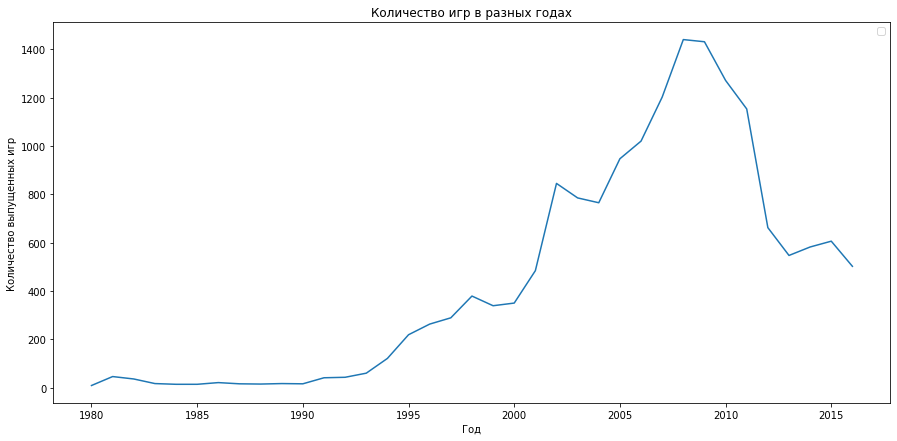

In [18]:
# чтобы просмотреть как менялось количество выпускаемых игр применим pivot_table для сортировки и нарисуем график
games_period = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(15,7))
sns.lineplot(data=games_period)
plt.title("Количество игр в разных годах")
plt.xlabel("Год")
plt.ylabel("Количество выпущенных игр")
plt.legend('')

Можно увидеть, что количество игр начало набирать рост с 1990-х годов до 2008 года. 
С 2008 год виден  спад. 
Чтобы построить какой- то прогноз не стоит учитывать устаревшие данные, предлагаю взять с 2006 и далее.

Изучим как менялись продажи по платформам.
Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.  За какой характерный срок появляются новые и исчезают старые платформы?

Возьмем данные за соответствующий актуальный период. Эти данные помогут построить прогноз на 2017 год. Не учитываем данные за предыдущие годы.

Определим - Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

Text(0, 0.5, 'Количество продаж')

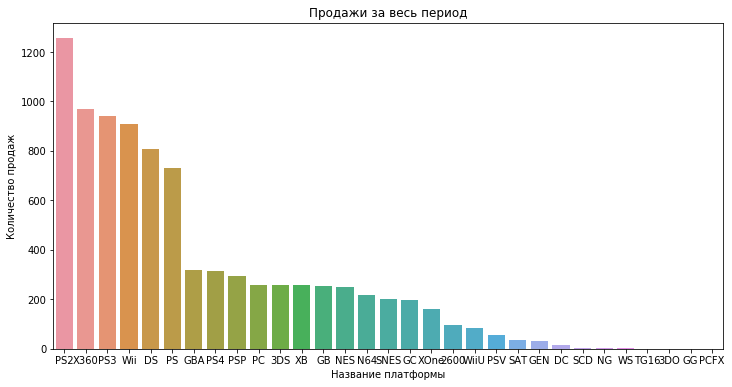

In [19]:
platform_sale = df.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=platform_sale.index,y=platform_sale['all_sales'])
plt.title("Продажи за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Видим, что самые популярные игровые платформы за весь период это PS2, X360, PS3, WII, DS, PS

In [20]:
# Сделаем функцию, которая возвратит сводную таблицу и вывыдет данные с 2006 года
def year_sale_for_platform(name, data):
    span = data[(data['platform'] == name) & (data['year_of_release'] > 2006)]
    total = span.pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total

In [21]:
# таблица платформ и их продаж
top_5 = df.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False).head(5)
top_5 = top_5.reset_index().rename_axis(None, axis=1)

In [22]:
top_5

,platform,all_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12


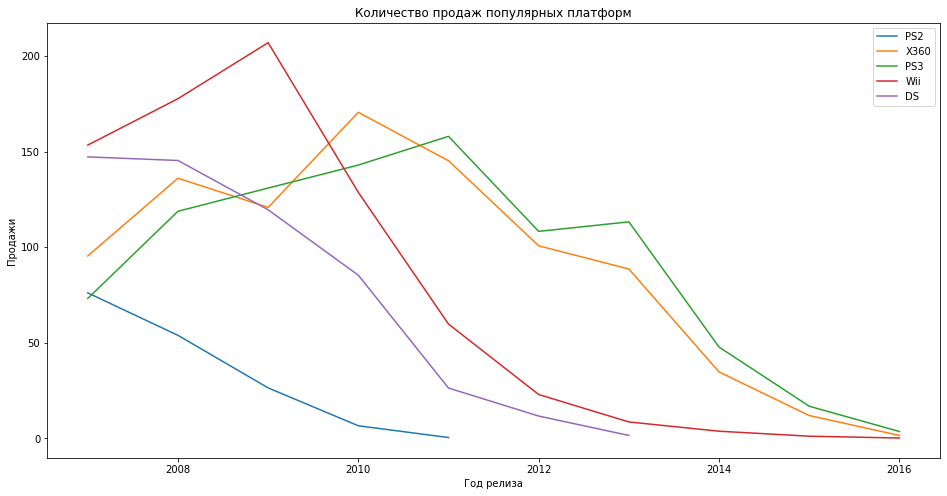

In [23]:
#Нарисуем все на одном графике для наглядности
plt.figure(figsize=(16,8))
plt.title('Количество продаж популярных платформ')
plt.xlabel('Год релиза')
plt.ylabel('Продажи')

for i in list(top_5['platform']):
    sns.lineplot(data=year_sale_for_platform(i,df)['all_sales'], label=i)
    plt.legend()

По большей части все игровые платформы существуют по 10 лет. Наблюдаем, что на пике продаж Sony Play Station 3 продажи второй версии практически сошли на нет.
Cамые продаваемые это Sony Play Station и XBOX.

Пик продаж наступает примерно через 5 лет после выхода приставки
Продажи Nintento WII резко пошли в гору в 2009 году и так же резко начали падать в момент, когда набирали обороты Sony Play Station и XBOX

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

In [24]:
#Сохраним в переменной  топ 5 платформ и избавимся от выбросов
list_of_top = ['PS2','X360','PS3','Wii','DS']
df_top_5 = df[df['platform'].isin(['PS2','X360','PS3','Wii','DS'])]
df_top_5 = df_top_5[df_top_5['all_sales']<1.5]

In [25]:
df_top_5['all_sales'].describe()

count    7538.000000
mean        0.291402
std         0.319281
min         0.000000
25%         0.070000
50%         0.170000
75%         0.410000
max         1.490000
Name: all_sales, dtype: float64

Text(0, 0.5, 'Продажи')

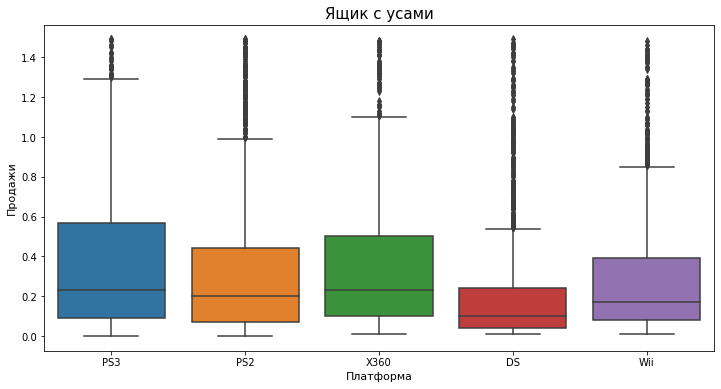

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top_5, x='platform', y='all_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=11)
plt.ylabel('Продажи',fontsize=11)

Построили ящик с усами по срезу данных.  По графику можно определить, что медиана проходит у всех по-разному.

Большая доля продаж приходится на PS3, затем X360, после PS2, WII и DS.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

In [27]:
#корреляция между оценками пользователей и продажами 
sony_play_station2 = df[df['platform']=='PS2']
sony_play_station2['user_score'].corr(sony_play_station2['all_sales'])

0.17286551112058213

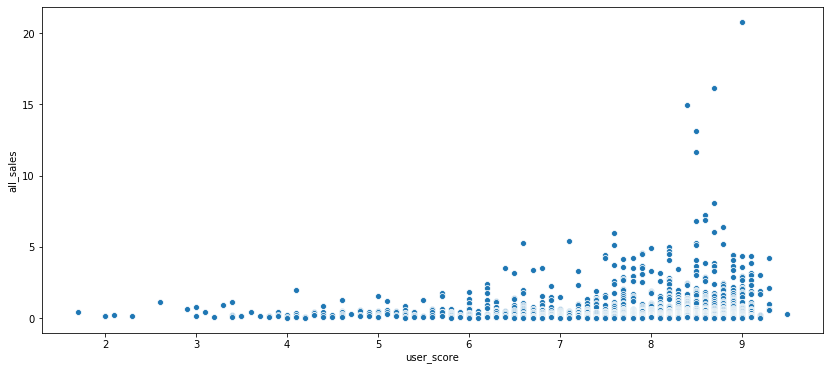

In [28]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='user_score', y='all_sales', data=sony_play_station2)

In [29]:
sony_play_station2['critic_score'].corr(sony_play_station2['all_sales'])

0.39543454945454876

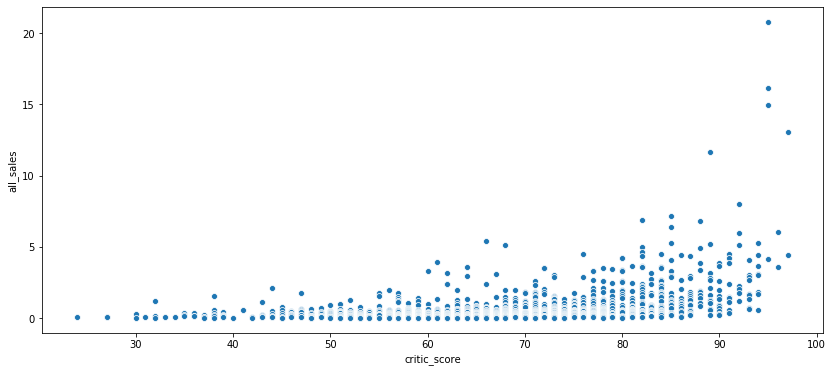

In [30]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='critic_score', y='all_sales', data=sony_play_station2)


Посмотрим, что с другими платформами

In [31]:
#Напишем функцию, которая будет отрисовывать графики рассеивания и считать корреляции
def other_platform(name_of_platform):
    platform = df[df['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(16,6))
    sns.scatterplot(x='user_score', y='all_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='all_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    correlation = platform['user_score'].corr(platform['all_sales'])
    critic_correl = platform['critic_score'].corr(platform['all_sales'])
    
    
    if 0.3 >= critic_correl >= 0.1:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Слабая', critic_correl)
    if 0.5 >= critic_correl >= 0.3:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Умеренная', critic_correl)
    if 0.7 >= critic_correl >= 0.5:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Высокая', critic_correl)
    if 0.9 >= critic_correl >= 0.7:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Весьма высокая', critic_correl)
    if 1 >= critic_correl >= 0.9:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Сильная', critic_correl)
    
    if 0.3 >= correlation >= 0.1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Слабая', correlation)
    if 0.5 >= correlation >= 0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Умеренная', correlation)
    if 0.7 >= correlation >= 0.5:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Высокая', correlation)
    if 0.9 >= correlation >= 0.7:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Весьма высокая', correlation)
    if 1 >= correlation >= 0.9:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Сильная', correlation)
    print('\n')

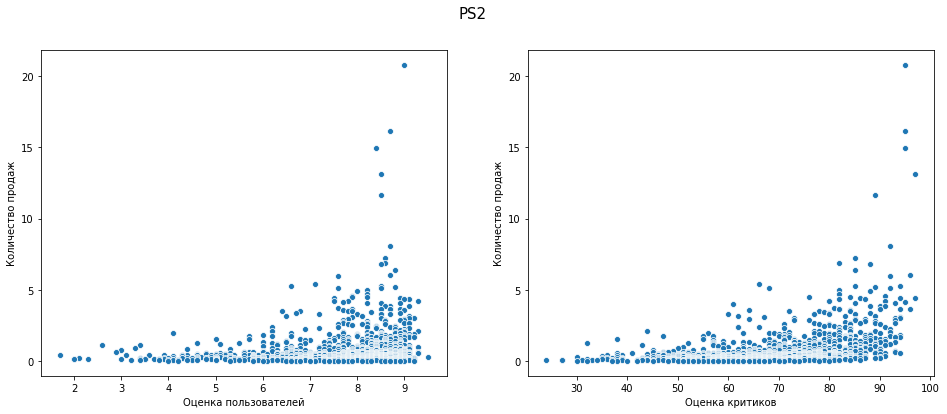

Корреляция между отзывами критиков и игровой платформой  PS2 : Умеренная 0.39543454945454876
Корреляция между отзывами пользователей и продажами  PS2 : Слабая 0.17286551112058213




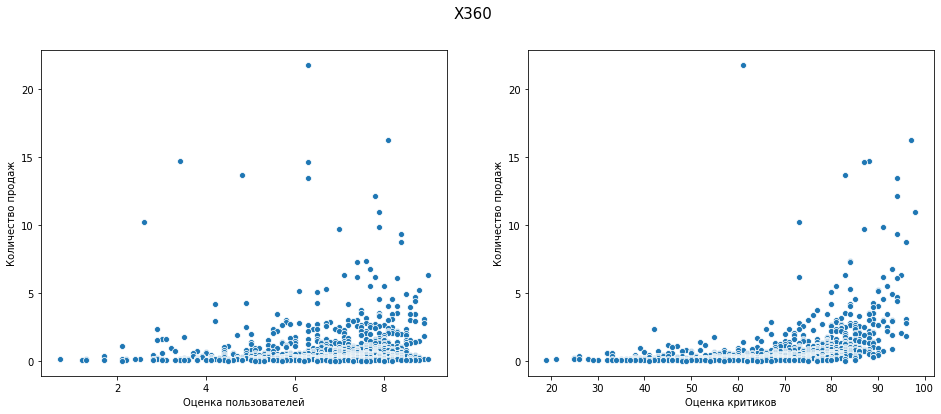

Корреляция между отзывами критиков и игровой платформой  X360 : Умеренная 0.3937358653072588
Корреляция между отзывами пользователей и продажами  X360 : Слабая 0.11445882978454185




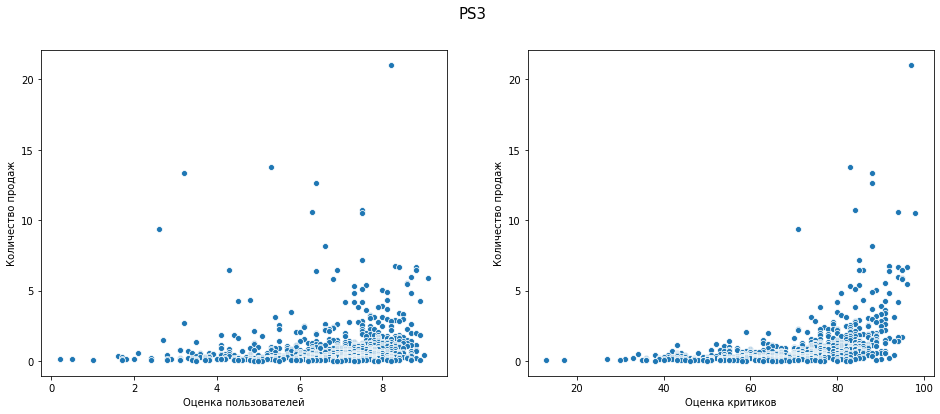

Корреляция между отзывами критиков и игровой платформой  PS3 : Умеренная 0.4324315685642061
Корреляция между отзывами пользователей и продажами  PS3 : Слабая 0.12669133936341712




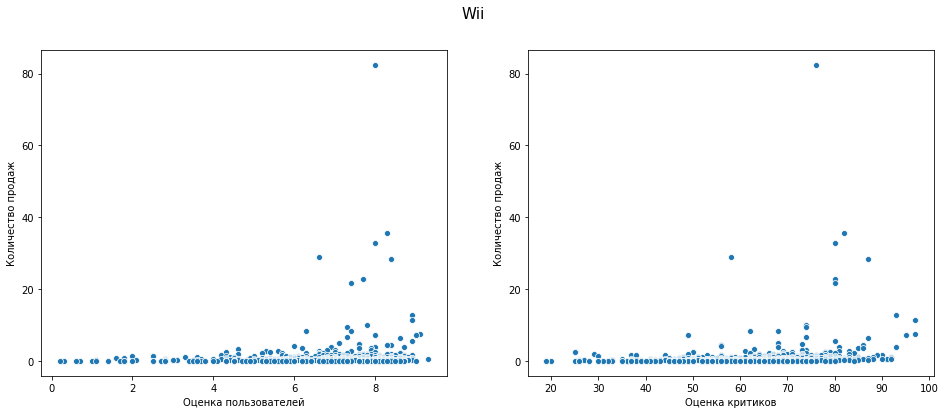

Корреляция между отзывами критиков и игровой платформой  WII : Слабая 0.17755988806089948
Корреляция между отзывами пользователей и продажами  WII : Слабая 0.11241436067003169




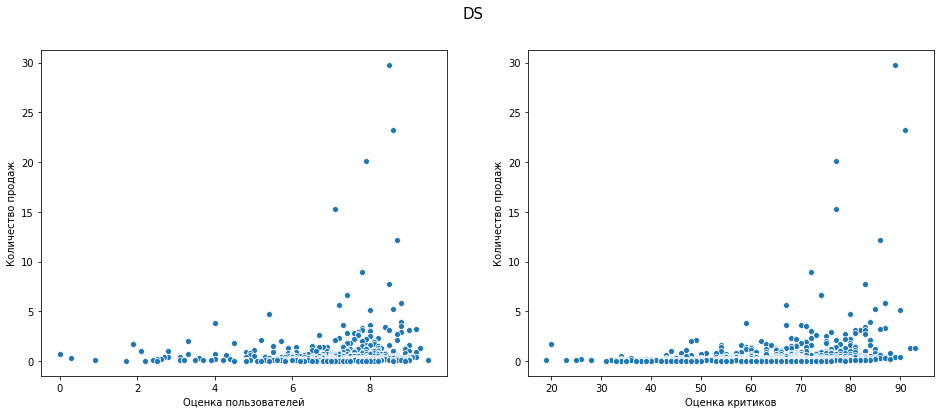

Корреляция между отзывами критиков и игровой платформой  DS : Слабая 0.23637945738859747
Корреляция между отзывами пользователей и продажами  DS : Слабая 0.1304355011164249




In [32]:
for platform in list_of_top:
    other_platform(platform)

In [33]:
#Посчитаем дисперсию, стандартное отклонение, среднее и медиану  к оценкам пользователей
for platform in list_of_top:
    print('Дисперсия',':', np.var(df[df['platform']==platform]['user_score']))
    print('Стандартное отклонение',':', np.std(df[df['platform']==platform]['user_score']))
    print('Среднее',':',  df[df['platform']==platform]['user_score'].mean())
    print('Медиана',':',  df[df['platform']==platform]['user_score'].median())
    print('\n')

Дисперсия : 1.7128899713716355
Стандартное отклонение : 1.3087742247506386
Среднее : 7.626833199033038
Медиана : 8.0


Дисперсия : 2.0752880868793646
Стандартное отклонение : 1.4405860220338682
Среднее : 6.683540372670807
Медиана : 7.0


Дисперсия : 2.1327377071986624
Стандартное отклонение : 1.460389573777717
Среднее : 6.726567844925884
Медиана : 7.1


Дисперсия : 3.019767825255102
Стандартное отклонение : 1.7377479176379702
Среднее : 6.742678571428572
Медиана : 7.15


Дисперсия : 2.27045054383751
Стандартное отклонение : 1.5068014281375997
Среднее : 7.025193798449613
Медиана : 7.4




In [34]:
#Посчитаем дисперсию, стандартное отклонение, среднее и медиану  к оценкам критиков
for platform in list_of_top:
    print('Дисперсия', ':', np.var(df[df['platform']==platform]['critic_score']))
    print('Стандартное отклонение',':', np.std(df[df['platform']==platform]['critic_score']))
    print('Среднее',':',  df[df['platform']==platform]['critic_score'].mean())
    print('Медиана',':',  df[df['platform']==platform]['critic_score'].median())
    print('\n')

Дисперсия : 170.82854741560442
Стандартное отклонение : 13.070139533134466
Среднее : 68.72727272727273
Медиана : 70.0


Дисперсия : 225.25163874640072
Стандартное отклонение : 15.008385614262473
Среднее : 68.61681222707423
Медиана : 71.0


Дисперсия : 196.96800118976796
Стандартное отклонение : 14.034528890909305
Среднее : 70.3829268292683
Медиана : 73.0


Дисперсия : 220.95190590985464
Стандартное отклонение : 14.86445108000476
Среднее : 62.82393162393162
Медиана : 65.0


Дисперсия : 184.03656565302896
Стандартное отклонение : 13.566007727147621
Среднее : 63.76150627615063
Медиана : 66.0




Практически у всех платформ присутствует корреляция между оценками пользователей и критиков.
Покупатели прислушиваются больше к критикам, чем к оценкам других пользователей.

Оценим распределение по жанрам

In [35]:
all_genre = df.pivot_table(
    index='genre', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False)
all_genre = all_genre.reset_index().rename_axis(None, axis=1)
all_genre

,genre,all_sales
0,Action,1744.17
1,Sports,1331.27
2,Shooter,1052.45
3,Role-Playing,934.56
4,Platform,827.77
5,Misc,802.51
6,Racing,728.67
7,Fighting,447.53
8,Simulation,389.97
9,Puzzle,242.57


Text(0, 0.5, 'Продажи')

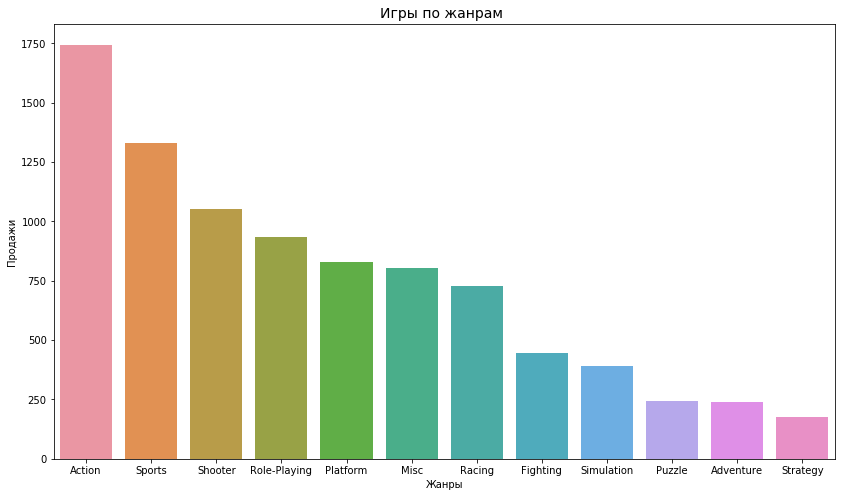

In [36]:
#строим барплот
plt.figure(figsize=(14,8))
plt.title('Игры по жанрам ',fontsize=14)
sns.barplot(data=all_genre, x='genre', y='all_sales')
plt.xlabel('Жанры',fontsize=10)
plt.ylabel('Продажи',fontsize=10)

Action жанр показывает лучшие продажи. Неожиданно стратегии на последнем месте.

**Вывод**

Рост количества игр на игровых приставках и компьютерах наблюдается с 90х годов примерно до 2008 года. С приходом мобильных приложений и  игр проиcходил резкий спад  игр на игровых платформах.
Наиболее популярные игровые платформы за исследуемый период : Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation.
В среднем срок жизни игровой платформы около 10 лет. Примерно через 5 лет после выхода приставки наступает пик продаж.
Большая часть продаж пришлась на Sony Playstation и Xbox 360
Nintendo WII ярко дал о себе знать, но не стал настолько популярен.
Наблюдается взаимосвязь между продажами и оценками критиков и пользователей. Более высокая корреляция между оценками критиков и продажами, что означает -  для людей мнение критиков важнее мнения пользователей.

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):

Самые популярные платформы (топ-5). 
Самые популярные жанры (топ-5). 
Определим влияние рейтинга ESRB на продажи в отдельном регионе

In [37]:


#Функция для создания сводбных таблиц за весь период и отрисовки барплотов
def image_piv(row, title):
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']),axes.flatten()[:3]):
        pivott = df.pivot_table(index=pivot, values=row, aggfunc='sum'
                  ).sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        print(pivott)
        print('\n\n') 
        sns.set_palette("bright")
        sns.barplot(data=pivott, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=12)
        

plt.show()
sns.set()

In [38]:
#функция для отрисовки за последний год

def image_piv_2016(row, title):
    temp = df[df['year_of_release']>2015]
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']), axes.flatten()[:3]):
        pivott = temp.pivot_table(index=pivot, values=row, aggfunc='sum').sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        print(pivott)
        print('\n\n')
        sns.set_palette("RdYlGn")
        sns.barplot(data=pivott, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)

North America

  platform  na_sales
0     X360    602.47
1      PS2    583.84
2      Wii    496.90
3      PS3    393.49
4       DS    382.40



      genre  na_sales
0    Action    879.01
1    Sports    684.43
2   Shooter    592.24
3  Platform    445.50
4      Misc    407.27



  rating  na_sales
0      E   1292.99
1      T    759.75
2      M    748.48
3   E10+    353.32
4    K-A      2.56





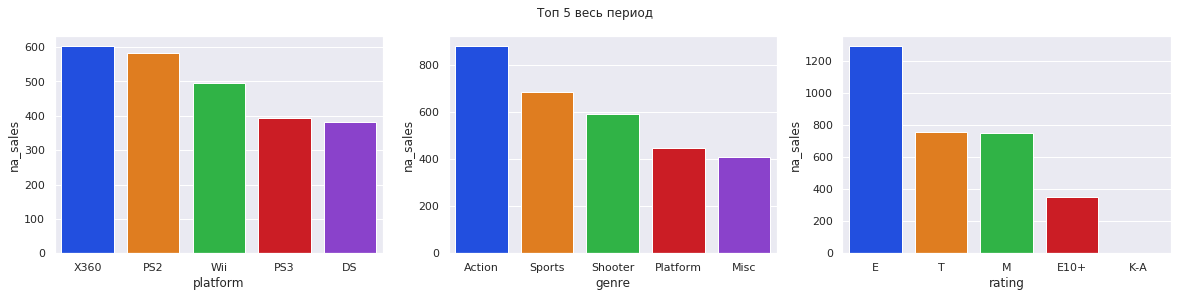

In [39]:
#топ 5 за весь период
image_piv('na_sales','Топ 5 весь период')

  platform  na_sales
0      PS4     21.49
1     XOne     14.27
2      3DS      4.14
3     WiiU      2.10
4       PC      1.36



          genre  na_sales
0       Shooter     16.24
1        Action      9.29
2        Sports      7.54
3  Role-Playing      5.89
4      Fighting      1.84



  rating  na_sales
0      M     15.67
1      T      8.95
2      E      7.97
3   E10+      3.81





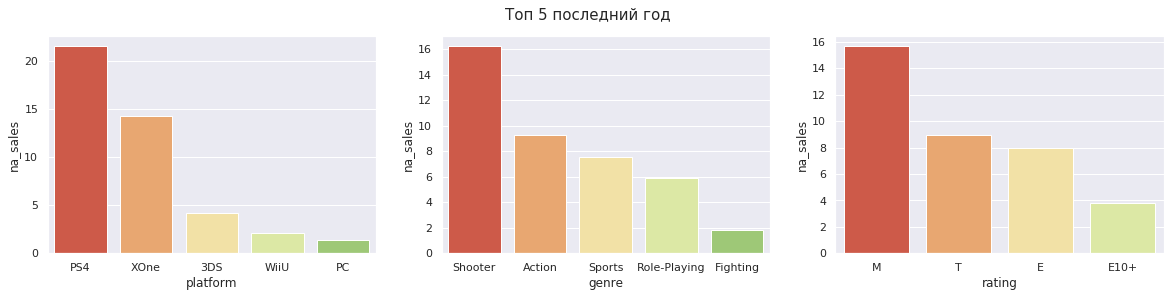

In [40]:
#Топ за последний год
image_piv_2016('na_sales','Топ 5 последний год')



Самые популярные игровые платформы в Cеверной Америке за все время: XBOX, PS2, WII, PS3, DS

Топ 5 жанров за все время: action, sports, shooter, platform, misc

По рейтингам видно, что больше всего продаж за все время у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"

Если мы посмотрим последний год, то увидим как поменялись интересы:

Топ игровых приставок PS4, Xone, DS3

Топ жанров игр: Shooter, Action, Sports

Топ рейтингов игр : "От 17 и выше" , "от 13 и выше" и "для всех"

**European Union**

  platform  eu_sales
0      PS2    339.29
1      PS3    330.29
2     X360    270.76
3      Wii    262.21
4       PS    213.61



     genre  eu_sales
0   Action    519.13
1   Sports    376.79
2  Shooter    317.34
3   Racing    236.51
4     Misc    212.74



  rating  eu_sales
0      E    710.25
1      M    483.97
2      T    427.03
3   E10+    188.52
4     AO      0.61





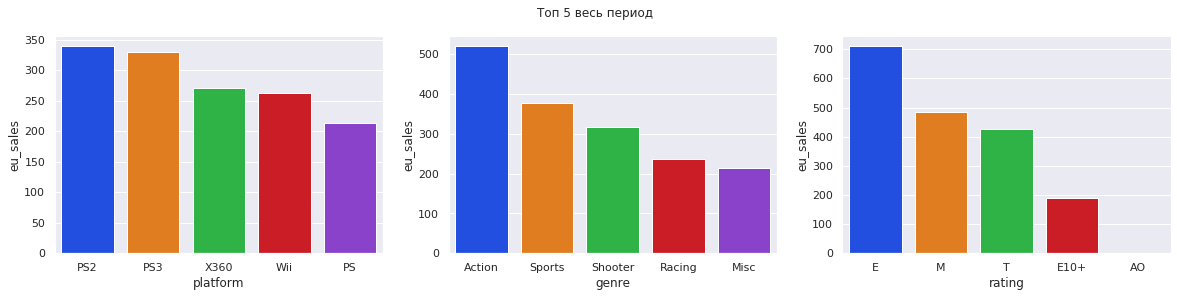

In [41]:
#весь период
image_piv('eu_sales','Топ 5 весь период')

  platform  eu_sales
0      PS4     31.78
1     XOne      9.63
2       PC      3.53
3      3DS      2.33
4     WiiU      1.48



          genre  eu_sales
0       Shooter     15.90
1        Sports     12.01
2        Action     10.68
3  Role-Playing      4.28
4        Racing      1.77



  rating  eu_sales
0      M     16.54
1      E     13.61
2      T      9.79
3   E10+      3.81





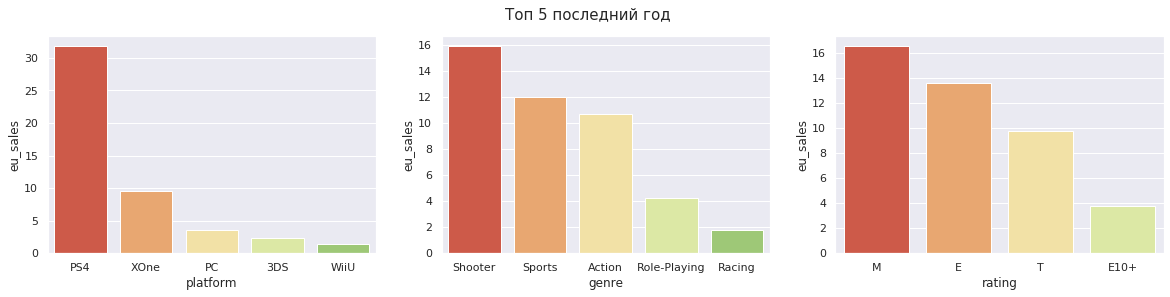

In [42]:
#Топ за последний год
image_piv_2016('eu_sales','Топ 5 последний год')

Самые популярные игровые платформы в Европе: PS2, PS3, X360, WII, PS

Топ 5 жанров: action, sports, shooter, racing, misc

Больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 17 и выше" и на третьем месте игры с рейтингом "от 13 и выше"

За последний год:

Топ жанров: shooter, sports, action

Топ платформ: PS4, Xone, PC

Рейтинг: "От 17 и выше" , "Для всех" и "от 13 и выше"

**Japanese**

  platform  jp_sales
0       DS    175.57
1       PS    139.82
2      PS2    139.20
3     SNES    116.55
4      3DS    100.67



          genre  jp_sales
0  Role-Playing    355.41
1        Action    161.43
2        Sports    135.54
3      Platform    130.83
4          Misc    108.11



  rating  jp_sales
0      E    198.11
1      T    151.40
2      M     64.24
3   E10+     40.20
4    K-A      1.46





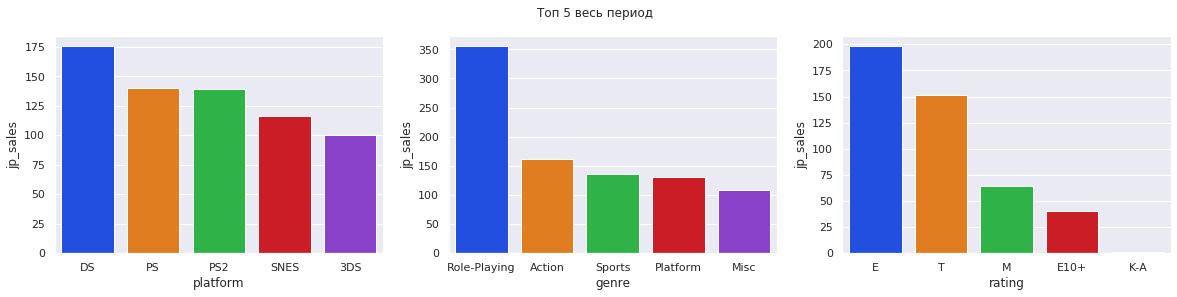

In [43]:
#весь период
image_piv('jp_sales','Топ 5 весь период')

  platform  jp_sales
0      3DS      8.03
1      PS4      5.74
2      PSV      3.56
3      PS3      1.30
4     WiiU      0.67



          genre  jp_sales
0        Action      7.07
1  Role-Playing      6.61
2     Adventure      1.18
3       Shooter      1.06
4          Misc      1.04



  rating  jp_sales
0      T      2.27
1      M      1.20
2      E      1.07
3   E10+      0.45





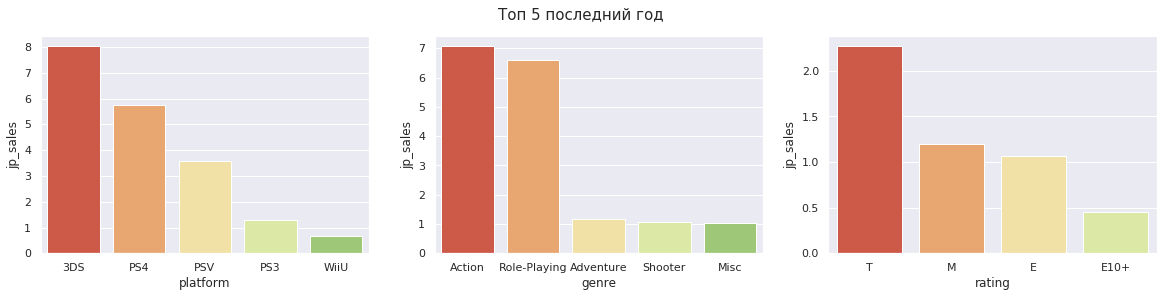

In [44]:
#за последний год
image_piv_2016('jp_sales','Топ 5 последний год')

Самые популярные игровые платформы в Японии: DS, PS, PS2, SNES, 3DS
    
Топ жанров : Role-Playing, action, sports, platform, misc
    
Больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"

За последний год:

Топ жанров: action, Role-Playing, adventure

Топ платформ: 3DS, PS4, PSV

Топ рейтингов: "от 13 и выше", "от 17 и выше" и "для всех

**Вывод по портрету пользователя**

В ходе исследования портрета пользователя мы дали оценку наиболее популярных категорий платформ, жанров и рейтингов для каждого региона. Следует заметить, что есть определенные отличия топов за весь период и последний год.

Для прогноза будущих продаж я бы рекомендовала  брать данные за последний год, учитывая рост технологий и изменяющихся взглядов пользователя. 


## Проверка гипотез

 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевые гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [45]:
df['platform'].unique()


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [46]:
xone = df[(df['platform']=='XOne') & (df['year_of_release']>2006)]['user_score']
pc = df[(df['platform']=='PC') & (df['year_of_release']>2006)]['user_score']

#средний рейтинг пользователя для xbox one платформ
xone.mean()


6.521428571428572

In [47]:
pc.mean()

6.773024054982817

In [48]:
#проверяем гипотезу используя метод ttest_ind

alpha = .01

results = st.ttest_ind(xone.dropna(), pc.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.037253715630861925
Не получилось отвергнуть нулевую гипотезу



Значение p-value равно чуть меньше 4%. Таким образом, не получилось опровергнуть нулевую гипотезу. 

Получается, что  с вероятностью в 4% можно получить различность рейтингов двух платформ

- Сформулируем нулевые гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые

Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются

In [49]:
genre_act_hyp = df[(df['genre']=='Action') & (df['year_of_release']>2006)]['user_score']
genre_sports_hyp = df[(df['genre']=='Sports') & (df['year_of_release']>2006)]['user_score']

#выведем среднюю оценку по жанру экшн
genre_act_hyp.mean()

6.839204545454545

In [50]:
genre_sports_hyp.mean()

6.3086294416243645

In [51]:
#  Проверка гипотезы 

alpha = .01

results = st.ttest_ind(genre_act_hyp.dropna(), genre_sports_hyp.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.064098789244688e-11
Отвергаем нулевую гипотезу


Исходя из полученного p-value мы отвергли нулевую гипотезу. 
Таким образом, у нас практически нет вероятности получить одинакове средние рейнтинги по указанным жанрам

**Вывод**

Гипотеза: "Средние пользовательские рейтинги платформ Xbox one и PC одинаковые". Нулевую гипотезу не удалось отвергнуть.

Гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные". 
Отвергаем нулевую гипотезу.

## Общий вывод исследования

В ходе проделанной работы было выполнено:

- Изучена таблица с данными, выявлены аномалии и пропущенные значения.
- Проведена необходимая предобработка данных
- Определен актуальный период, проведено исследование данных
- Составлены портреты пользователей для регионов
- Проверены гипотезы

Определили значение аббревиатуры TBD - что значит to be determined, to be done. 
Данные были нарочно не заполнены. Произвели замену tbd на nan для проведения дальнейшего анализа.

В ходе анализа  мы выявили, что количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х до 2008 года. С 2008 года после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок консольных игр.
За весь период консольных приставок самыми популярными стали: PS2, X360, PS3, WII, DS, PS.

Также мы выявили, что средняя продолжительность жизни игровой приставки составляет около 10 лет. Самый пик продаж наступает примерно через 5 лет после выпуска.

Кроме того мы заметили, что у Nintendo WII был резкий скачок в 2009 году и  резкий провал. Видимо, когда как под рукой всегда был смартфон с любыми играми на вкус, потребность в приставке отпадала.

Проведя анализ оценок пользователей и критиков, стало понятно, что оценки критиков и пользователей взаимосвязаны с продажами. Чем выше оценка критиков, тем выше продажи.

Cамым популярным жанром за все время стал Action. 


В ходе проведенного анализа мы выяснили, что в Северной америке самые популярные жанры это Action, Sports, Shooter. Игровые приставки : XBOX, PS2 и WII. По рейтингу игр люди предпочитают игры с рейтингами: "для всех", "от 13 и выше" и "от 17 и выше".

В Европе популярные жанры аналогичны Северной Америке. Приоритет приставок следующий: PS2, PS3, XBOX. Рейтинг игр отличается  вторым местом, на втором месте у них "от 17 и выше", а на третьем "13 и выше".

В Японии  предпочитают игровые приставки: DS, PS, PS2. А жанры: Role-playing, action и sports. Рейтинг игр аналогичный Северной Америке.

**Итог:** 

Продажи компьютерных игр зависят от следующих факторов:

кто игру создал, на какой платформе она сделана и какого она жанра.

Популярны те компании, которые уже давно разрабатывают игры. Они используют свои ресурсы и опытт, и уже накопили аудиторию фанатов, которая захочет купит их игру.

Чем лучше платформа, тем сильнее возможность сделать игру лучше. Жизненный цикл обусловлен скачками в технологиях.

Выбор жанра - очень специфичный критерий, каждый человек уникален и имеет свой вкус. Соответственно у каждого разработчика есть аудитория со своим вкусом,  cоответственно издатели борятся за целевую аудиторию своего продукта.

*Предложения:*

Основную ставку делать на  современные платформы. Закупать новые игры на PS4, XOne и 3DS.
Рекламировать наличие жанров  экшен, шутеры, спортивных и ролевых игр.
Обращать внимание на аудиторию.
Большая часть игр рассчитана на игроков, которым 17 лет и старше.
